In [55]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/Netology/Big Data/Материалы_к_лекции_2/homework.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df1 = df[['medv', 'chas']].groupby('chas').count()
df1.head()

#количество домов у реки = 20, не у реки = 313 
#проверим, отражается ли это на цене 

,medv
chas,
0,313
1,20


<AxesSubplot:xlabel='medv', ylabel='chas'>

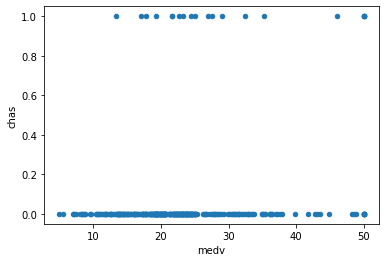

In [14]:
df.plot(kind = 'scatter', x = 'medv', y = 'chas')

#видим, что наличие реки для стоимости дома не принципиально, но больше всего там домов с средней ценой

<AxesSubplot:xlabel='nox', ylabel='medv'>

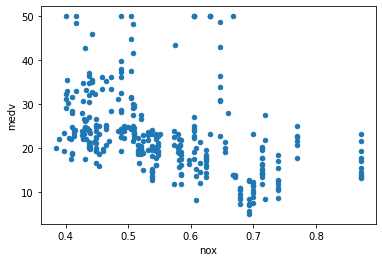

In [18]:
df.plot(kind = 'scatter', x = 'nox', y = 'medv')

#тут видим, что больше всего домов там, где концентрация озота ниже

<AxesSubplot:xlabel='crim', ylabel='medv'>

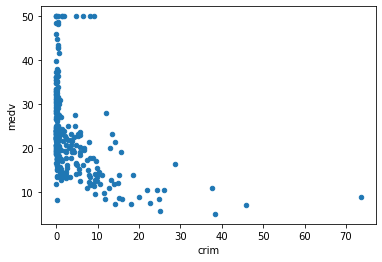

In [19]:
df.plot(kind = 'scatter', x = 'crim', y = 'medv')

#видим, что намного больше домов выставлено на продажу в районах с низким криминальным уровнем 

<AxesSubplot:xlabel='rm', ylabel='medv'>

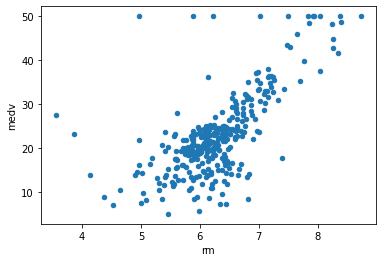

In [20]:
df.plot(kind = 'scatter', x = 'rm', y = 'medv')

#тут показана зависимость комнатности жилья и его цены, видим, что домов с количеством комнат 5-7 на рынке 
#больше всего, к тому же, их цена средняя(не высокая и не низкая)

<AxesSubplot:xlabel='rad', ylabel='medv'>

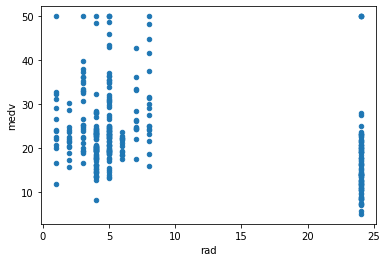

In [22]:
df.plot(kind = 'scatter', x = 'rad', y = 'medv')\

#тту уровень доступности жилья в соотношении с ценой, больше всего домов с уровнем доступности до 8 

Теперь строим модель для теста и обучения



In [23]:
X, y = df[['crim', 'nox', 'rm', 'rad']], df['medv']

In [28]:
print(X)
print('.....................................')
print(y)

        crim    nox     rm  rad
0    0.00632  0.538  6.575    1
1    0.02731  0.469  6.421    2
2    0.03237  0.458  6.998    3
3    0.06905  0.458  7.147    3
4    0.08829  0.524  6.012    5
..       ...    ...    ...  ...
328  0.17783  0.585  5.569    6
329  0.06263  0.573  6.593    1
330  0.04527  0.573  6.120    1
331  0.06076  0.573  6.976    1
332  0.04741  0.573  6.030    1

[333 rows x 4 columns]
.....................................
0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train) 

#обучили модель

LinearRegression()

In [42]:
model.score(X, y)

#Возвращает коэффициент определения предсказания

0.5291313730234195

In [44]:
model.coef_

#оценочный коэфициент для линейной регрессии

array([-0.2081842 , -9.52734105,  7.27441104, -0.03175278])

In [34]:
y_pred = model.predict(X_test)
y_pred

#прогноз

array([23.72760204, 20.55658728, 20.60136531,  2.70251728, 20.06113309,
       25.25624344, 15.3675392 , 16.51546391, 26.2865722 , 19.05984983,
       22.99659525, 20.91415145, 35.5030507 , 29.25829358, 14.89558542,
       20.67204151,  9.93115338, 23.58061331, 21.34501494, 12.97119785,
       22.64432112, 19.86960295, 10.60432461, 22.097971  , 35.20366168,
       30.07997744, 19.44188692, 27.3043084 , 12.50799734, 23.35428387,
       21.1221605 ,  8.16266051, 25.81235516, 24.94325745, 28.3337231 ,
       16.93916096, 21.78467212, 21.44843543, 13.77788024, 19.40057944,
       20.33401045, 21.6883623 , 24.76123238, 26.52096431, 31.34424694,
       24.09995189, 12.94298201, 22.5767599 , 17.82888063, 19.17986641,
       21.61734476, 27.54352801, 30.82438556, 25.40585187, 30.02059421,
       20.48589689, 22.27037112, 32.67622897, 31.61177274, 13.50291476,
       17.08035268, 18.28153264, 24.85790549, 26.13445498, 24.10913174,
       20.67660472, 32.12637902])

In [36]:
mean_squared_error(y_test, y_pred)

#Квадратный корень из стоимости, полученного из средней ошибки квадрата
#не больше 180 - хорошо 

22.61654060959771

In [58]:
mean_squared_error(y_test, y_pred, squared = 'True')

#средняя разница в квадрате между предсказанным и фактическим значением

147.0283717180815